# Plotting Probability using Matplotlib

## Basic Matplotlib plots

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

**Plotting a linear relationship**

Text(0.5, 1.0, 'Plot of x vs 2x')

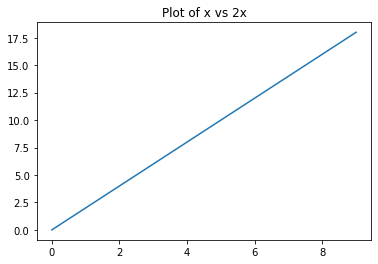

In [2]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.title("Plot of x vs 2x")

# Matplot axes are not evenly space.
# plt.axis('equal')

**Plotting individual data points**

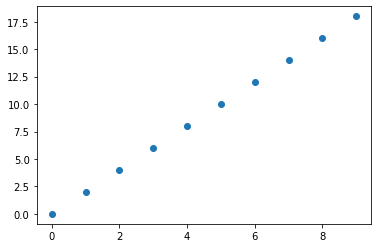

In [3]:
plt.scatter(x, y)

**Shading an interval beneath a connected plot** 

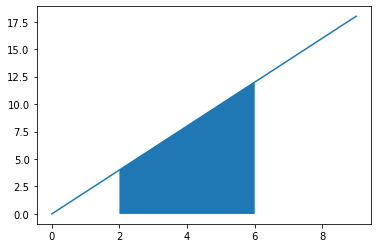

In [4]:
%run prob_utils.py

plt.plot(x, y)

where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)

**Exposing individual coordinates within a continuous plot**

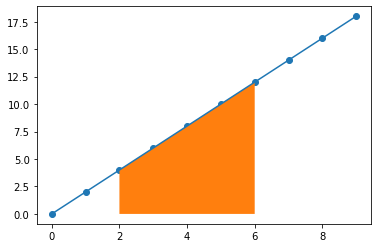

In [5]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)

**Adding axis labels**

Text(0, 0.5, 'Twice the values of x')

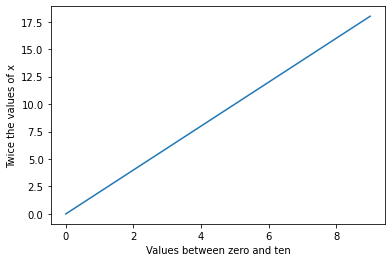

In [6]:
plt.plot(x, y)
plt.xlabel("Values between zero and ten")
plt.ylabel("Twice the values of x")

## Plotting coin-flip probabilities

In [7]:
weighted_sample_space = generate_coin_sample_space()
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)

**Plotting the coin-flip weighted sample space**

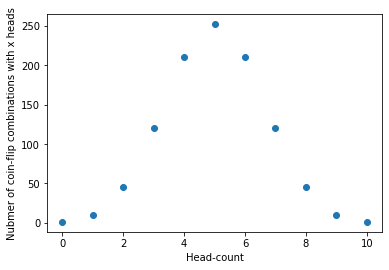

In [8]:
# Similar as below:
# x_10_flips = weighted_sample_space.keys()
# y_10_flips = weighted_sample_space.values()
x_10_flips, y_10_flips = zip(*weighted_sample_space.items())

plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Nubmer of coin-flip combinations with x heads")
plt.show()

**Plotting the coin-flip probabilities**

Compute the y-axis probabilities by dividing the existing combinations count by the total sample space size.

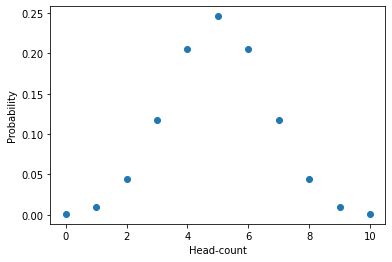

In [9]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Plot inference
- probability of observing 5-heads is 0.25
- the mapping between x-values and probabilities is referred to as a probability distribution
- total area beneath the probability distribution always equals 1.0

**Confirming that all probabilities sum to 1.0**

In [10]:
assert sum(prob_x_10_flips) == 1.0

**Shading the interval under a probability curve**

Text(0, 0.5, 'Probability')

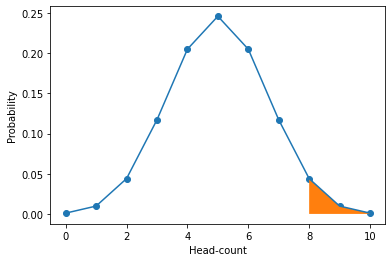

In [11]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)

where = [is_in_interval(value, 8, 10) for value in x_10_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("Head-count")
plt.ylabel("Probability")

**Shading the interval under the extremes of a probability curve**

Text(0, 0.5, 'Probability')

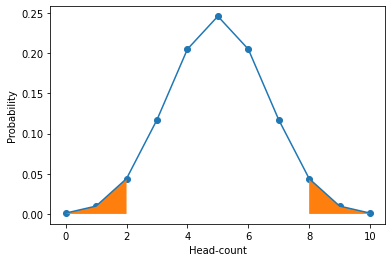

In [12]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)

where = [not is_in_interval(value, 3, 7) for value in x_10_flips]

plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("Head-count")
plt.ylabel("Probability")

### Comparing multiple coin-flip probability distribution

In [13]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = list(weighted_sample_space_20_flips.values())
sample_space_size = sum(y_20_flips)
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

**Plotting two simultaneous distributions**

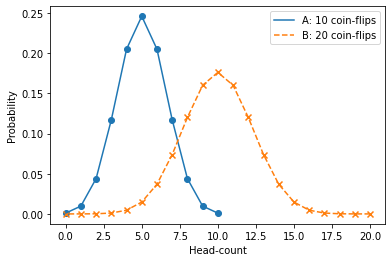

In [14]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
plt.scatter(x_10_flips, prob_x_10_flips)


plt.plot(x_20_flips, prob_x_20_flips, label="B: 20 coin-flips", linestyle="--")
plt.scatter(x_20_flips, prob_x_20_flips, marker="x")

plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.legend()

**Highlighting intervals between two-plotted distributions**

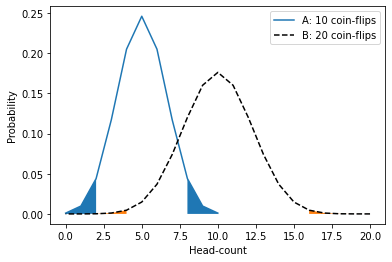

In [15]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)


plt.plot(
    x_20_flips, prob_x_20_flips, label="B: 20 coin-flips", linestyle="--", color="k"
)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.legend()

**Converting head counts into frequencies**

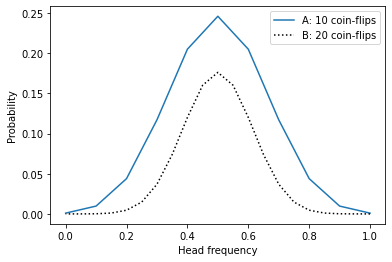

In [16]:
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(
    x_20_frequencies,
    prob_x_20_flips,
    label="B: 20 coin-flips",
    linestyle=":",
    color="k",
)  # 'k' is the color code for black


plt.xlabel("Head frequency")
plt.ylabel("Probability")
plt.legend()

**Computing relative likelihoods of frequencies**

- division by 10 and 20 respectively reduces the areas beneath the two curves by 10-fold and 20-fold
- the total area beneath the curve is no longer equals 1.0
- y-values needs to be adjusted
- relative likelihood refers to a y-axis value within a curve whose total area is 1.0


In [17]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

**Plotting aligned relative likelihood curves**

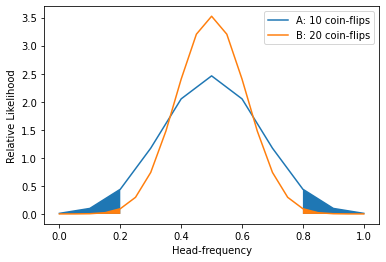

In [18]:
plt.plot(x_10_frequencies, relative_likelihood_10, label="A: 10 coin-flips")
plt.plot(x_20_frequencies, relative_likelihood_20, label="B: 20 coin-flips")

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel("Head-frequency")
plt.ylabel("Relative Likelihood")
plt.show()